# Data Science: Films

## Onderzoeksvragen

1. In hoeverre is de omzet van een film te voorspellen op basis van de populariteit op Facebook en IMDB zelf?
2. In hoeverre zijn er groepen te onderscheiden op basis van budget, score en facebook likes?
3. In hoeverre is een relatie te zien tussen de omzet van de film en de verhouding tussen de geslacht van een directeur van een film?

## Proces stap 1 t/m 4 

In [1]:
# importeert benodigde libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', 100)

## Stap 1: Data collection

In [2]:
# importeer CSV file
df_movies = pd.read_csv('movie.csv')

In [3]:
# Toon gegevens
df_movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
# Toon de kolommen
df_movies.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [5]:
# Toon de kolom types
df_movies.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

## Stap 2: Data Processing 

In [6]:
# Volgorde van kolommen veranderen voor een beter overzicht
cols = ['movie_title', 'imdb_score', 'title_year',
        'genres', 'duration', 'budget', 'gross',
        'color', 'language', 'country',  'director_name', 'actor_1_name', 
        'actor_2_name', 'actor_3_name',  
        'movie_imdb_link', 'facenumber_in_poster', 'plot_keywords', 
        'content_rating', 'aspect_ratio', 'num_user_for_reviews', 
        'num_voted_users', 'num_critic_for_reviews', 
        'movie_facebook_likes', 'director_facebook_likes', 
        'actor_1_facebook_likes', 'actor_2_facebook_likes', 
        'actor_3_facebook_likes', 'cast_total_facebook_likes']
df_movies = df_movies[cols]

In [7]:
# Toon de nieuwe volgorde
df_movies.head()

,movie_title,imdb_score,title_year,genres,duration,budget,gross,color,language,country,director_name,actor_1_name,actor_2_name,actor_3_name,movie_imdb_link,facenumber_in_poster,plot_keywords,content_rating,aspect_ratio,num_user_for_reviews,num_voted_users,num_critic_for_reviews,movie_facebook_likes,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes
0,Avatar,7.9,2009.0,Action|Adventure|Fantasy|Sci-Fi,178.0,237000000.0,760505847.0,Color,English,USA,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,0.0,avatar|future|marine|native|paraplegic,PG-13,1.78,3054.0,886204,723.0,33000,0.0,1000.0,936.0,855.0,4834
1,Pirates of the Caribbean: At World's End,7.1,2007.0,Action|Adventure|Fantasy,169.0,300000000.0,309404152.0,Color,English,USA,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,0.0,goddess|marriage ceremony|marriage proposal|pi...,PG-13,2.35,1238.0,471220,302.0,0,563.0,40000.0,5000.0,1000.0,48350
2,Spectre,6.8,2015.0,Action|Adventure|Thriller,148.0,245000000.0,200074175.0,Color,English,UK,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,1.0,bomb|espionage|sequel|spy|terrorist,PG-13,2.35,994.0,275868,602.0,85000,0.0,11000.0,393.0,161.0,11700
3,The Dark Knight Rises,8.5,2012.0,Action|Thriller,164.0,250000000.0,448130642.0,Color,English,USA,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,0.0,deception|imprisonment|lawlessness|police offi...,PG-13,2.35,2701.0,1144337,813.0,164000,22000.0,27000.0,23000.0,23000.0,106759
4,Star Wars: Episode VII - The Force Awakens ...,7.1,NaN,Documentary,NaN,NaN,NaN,NaN,NaN,NaN,Doug Walker,Doug Walker,Rob Walker,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,0.0,NaN,NaN,NaN,NaN,8,NaN,0,131.0,131.0,12.0,NaN,143


## Stap 3: Data cleaning

In [8]:
# Toon alle kolommen met values die niet leeg zijn
pd.notnull(df_movies).sum()

movie_title                  5043
imdb_score                   5043
title_year                   4935
genres                       5043
duration                     5028
budget                       4551
gross                        4159
color                        5024
language                     5031
country                      5038
director_name                4939
actor_1_name                 5036
actor_2_name                 5030
actor_3_name                 5020
movie_imdb_link              5043
facenumber_in_poster         5030
plot_keywords                4890
content_rating               4740
aspect_ratio                 4714
num_user_for_reviews         5022
num_voted_users              5043
num_critic_for_reviews       4993
movie_facebook_likes         5043
director_facebook_likes      4939
actor_1_facebook_likes       5036
actor_2_facebook_likes       5030
actor_3_facebook_likes       5020
cast_total_facebook_likes    5043
dtype: int64

In [9]:
# Toon alle kolommen met lege values
pd.isnull(df_movies).sum()

movie_title                    0
imdb_score                     0
title_year                   108
genres                         0
duration                      15
budget                       492
gross                        884
color                         19
language                      12
country                        5
director_name                104
actor_1_name                   7
actor_2_name                  13
actor_3_name                  23
movie_imdb_link                0
facenumber_in_poster          13
plot_keywords                153
content_rating               303
aspect_ratio                 329
num_user_for_reviews          21
num_voted_users                0
num_critic_for_reviews        50
movie_facebook_likes           0
director_facebook_likes      104
actor_1_facebook_likes         7
actor_2_facebook_likes        13
actor_3_facebook_likes        23
cast_total_facebook_likes      0
dtype: int64

In [10]:
# Verwijder alle rijen met lege values
df_movies.dropna(inplace=True)

In [11]:
# Kijken of het werkt! 0 == geen lege values
pd.isnull(df_movies).sum()

movie_title                  0
imdb_score                   0
title_year                   0
genres                       0
duration                     0
budget                       0
gross                        0
color                        0
language                     0
country                      0
director_name                0
actor_1_name                 0
actor_2_name                 0
actor_3_name                 0
movie_imdb_link              0
facenumber_in_poster         0
plot_keywords                0
content_rating               0
aspect_ratio                 0
num_user_for_reviews         0
num_voted_users              0
num_critic_for_reviews       0
movie_facebook_likes         0
director_facebook_likes      0
actor_1_facebook_likes       0
actor_2_facebook_likes       0
actor_3_facebook_likes       0
cast_total_facebook_likes    0
dtype: int64

In [12]:
# Kijken de kolommen nog gegevens bevatten
pd.notnull(df_movies).sum()

movie_title                  3756
imdb_score                   3756
title_year                   3756
genres                       3756
duration                     3756
budget                       3756
gross                        3756
color                        3756
language                     3756
country                      3756
director_name                3756
actor_1_name                 3756
actor_2_name                 3756
actor_3_name                 3756
movie_imdb_link              3756
facenumber_in_poster         3756
plot_keywords                3756
content_rating               3756
aspect_ratio                 3756
num_user_for_reviews         3756
num_voted_users              3756
num_critic_for_reviews       3756
movie_facebook_likes         3756
director_facebook_likes      3756
actor_1_facebook_likes       3756
actor_2_facebook_likes       3756
actor_3_facebook_likes       3756
cast_total_facebook_likes    3756
dtype: int64

In [13]:
# Kijken wat of alles nog goed getoont wordt.
df_movies.head()

,movie_title,imdb_score,title_year,genres,duration,budget,gross,color,language,country,director_name,actor_1_name,actor_2_name,actor_3_name,movie_imdb_link,facenumber_in_poster,plot_keywords,content_rating,aspect_ratio,num_user_for_reviews,num_voted_users,num_critic_for_reviews,movie_facebook_likes,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes
0,Avatar,7.9,2009.0,Action|Adventure|Fantasy|Sci-Fi,178.0,237000000.0,760505847.0,Color,English,USA,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,0.0,avatar|future|marine|native|paraplegic,PG-13,1.78,3054.0,886204,723.0,33000,0.0,1000.0,936.0,855.0,4834
1,Pirates of the Caribbean: At World's End,7.1,2007.0,Action|Adventure|Fantasy,169.0,300000000.0,309404152.0,Color,English,USA,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,0.0,goddess|marriage ceremony|marriage proposal|pi...,PG-13,2.35,1238.0,471220,302.0,0,563.0,40000.0,5000.0,1000.0,48350
2,Spectre,6.8,2015.0,Action|Adventure|Thriller,148.0,245000000.0,200074175.0,Color,English,UK,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,1.0,bomb|espionage|sequel|spy|terrorist,PG-13,2.35,994.0,275868,602.0,85000,0.0,11000.0,393.0,161.0,11700
3,The Dark Knight Rises,8.5,2012.0,Action|Thriller,164.0,250000000.0,448130642.0,Color,English,USA,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,0.0,deception|imprisonment|lawlessness|police offi...,PG-13,2.35,2701.0,1144337,813.0,164000,22000.0,27000.0,23000.0,23000.0,106759
5,John Carter,6.6,2012.0,Action|Adventure|Sci-Fi,132.0,263700000.0,73058679.0,Color,English,USA,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,1.0,alien|american civil war|male nipple|mars|prin...,PG-13,2.35,738.0,212204,462.0,24000,475.0,640.0,632.0,530.0,1873


In [14]:
# Haal spaties titel weg
df_movies['movie_title'] = df_movies['movie_title'].str.strip()

## Stap 4: Data exploration

In [15]:
# Toon meer informatie
df_movies.describe()

,imdb_score,title_year,duration,budget,gross,facenumber_in_poster,aspect_ratio,num_user_for_reviews,num_voted_users,num_critic_for_reviews,movie_facebook_likes,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes
count,3756.000000,3756.000000,3756.000000,3.756000e+03,3.756000e+03,3756.000000,3756.000000,3756.000000,3.756000e+03,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000
mean,6.465282,2002.976571,110.257987,4.623685e+07,5.261282e+07,1.377263,2.111014,336.843184,1.058267e+05,167.378328,9353.829340,807.336528,7751.338658,2021.775825,771.279553,11527.101970
std,1.056247,9.888108,22.646717,2.260103e+08,7.031787e+07,2.041541,0.353068,411.227368,1.520354e+05,123.452040,21462.889123,3068.171683,15519.339621,4544.908236,1894.249869,19122.176905
min,1.600000,1927.000000,37.000000,2.180000e+02,1.620000e+02,0.000000,1.180000,4.000000,9.100000e+01,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.900000,1999.000000,96.000000,1.000000e+07,8.270233e+06,0.000000,1.850000,110.000000,1.966700e+04,77.000000,0.000000,11.000000,745.000000,384.750000,194.000000,1919.750000
50%,6.600000,2004.000000,106.000000,2.500000e+07,3.009311e+07,1.000000,2.350000,210.000000,5.397350e+04,138.500000,227.000000,64.000000,1000.000000,685.500000,436.000000,4059.500000
75%,7.200000,2010.000000,120.000000,5.000000e+07,6.688194e+07,2.000000,2.350000,398.250000,1.286020e+05,224.000000,11000.000000,235.000000,13000.000000,976.000000,691.000000,16240.000000
max,9.300000,2016.000000,330.000000,1.221550e+10,7.605058e+08,43.000000,16.000000,5060.000000,1.689764e+06,813.000000,349000.000000,23000.000000,640000.000000,137000.000000,23000.000000,656730.000000


# Onderzoeksvraag 3: 

### In hoeverre is een relatie te zien tussen de omzet van de film en de verhouding tussen de geslacht van de hoofdrolspelers van een film?

In [16]:
# importeer Externe bronnen
df_actors = pd.read_csv("actors.csv")
df_movies_metadata = pd.read_csv("movies_metadata.csv", low_memory=False)
df_actors.head(10)

,Unnamed: 0,cast_id,gender,id,name,order,movie_id
0,1,14,2,31,Tom Hanks,0,862
1,2,15,2,12898,Tim Allen,1,862
2,3,16,2,7167,Don Rickles,2,862
3,4,17,2,12899,Jim Varney,3,862
4,5,18,2,12900,Wallace Shawn,4,862
5,6,19,2,7907,John Ratzenberger,5,862
6,7,20,1,8873,Annie Potts,6,862
7,8,26,0,1116442,John Morris,7,862
8,9,22,2,12901,Erik von Detten,8,862
9,10,23,1,12133,Laurie Metcalf,9,862


In [17]:
df_movies_metadata.head(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,/zMyfPUelumio3tiDKPffaUpsQTD.jpg,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,6.677277,/jQh15y5YB7bWz1NtffNZmRw0s9D.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",2.561161,/sGO5Qa55p7wTu7FJcX4H4xIVKvS.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,To

In [18]:
# check null values
pd.isnull(df_actors).sum()

Unnamed: 0    0
cast_id       0
gender        0
id            0
name          0
order         0
movie_id      0
dtype: int64

In [19]:
# check null values "id"
pd.isnull(df_movies_metadata["id"]).sum()

0

In [20]:
# check null values "original_title"
pd.isnull(df_movies_metadata["original_title"]).sum()

0

### Alles tot nu toe gucci 

In [21]:
df_merge_actors_movies = pd.merge(df_actors, df_movies_metadata, left_on='movie_id', right_index=True)

In [22]:
df_merge_actors_movies.head()

,Unnamed: 0,cast_id,gender,id_x,name,order,movie_id,adult,belongs_to_collection,budget,genres,homepage,id_y,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,1,14,2,31,Tom Hanks,0,862,False,NaN,0,[],NaN,101230,tt0109001,nl,06,"Sarah, 30, single, well educated, likes art, p...",0.062128,/xnsvk2a8BbvGfnFdynKSuA4qVFq.jpg,[],[],1994-09-01,0.0,0.0,"[{'iso_639_1': 'nl', 'name': 'Nederlands'}, {'...",Released,NaN,1-900,False,5.0,1.0
1,2,15,2,12898,Tim Allen,1,862,False,NaN,0,[],NaN,101230,tt0109001,nl,06,"Sarah, 30, single, well educated, likes art, p...",0.062128,/xnsvk2a8BbvGfnFdynKSuA4qVFq.jpg,[],[],1994-09-01,0.0,0.0,"[{'iso_639_1': 'nl', 'name': 'Nederlands'}, {'...",Released,NaN,1-900,False,5.0,1.0
2,3,16,2,7167,Don Rickles,2,862,False,NaN,0,[],NaN,101230,tt0109001,nl,06,"Sarah, 30, single, well educated, likes art, p...",0.062128,/xnsvk2a8BbvGfnFdynKSuA4qVFq.jpg,[],[],1994-09-01,0.0,0.0,"[{'iso_639_1': 'nl', 'name': 'Nederlands'}, {'...",Released,NaN,1-900,False,5.0,1.0
3,4,17,2,12899,Jim Varney,3,862,False,NaN,0,[],NaN,101230,tt0109001,nl,06,"Sarah, 30, single, well educated, likes art, p...",0.062128,/xnsvk2a8BbvGfnFdynKSuA4qVFq.jpg,[],[],1994-09-01,0.0,0.0,"[{'iso_639_1': 'nl', 'name': 'Nederlands'}, {'...",Released,NaN,1-900,False,5.0,1.0
4,5,18,2,12900,Wallace Shawn,4,862,False,NaN,0,[],NaN,101230,tt0109001,nl,06,"Sarah, 30, single, well educated, likes art, p...",0.062128,/xnsvk2a8BbvGfnFdynKSuA4qVFq.jpg,[],[],1994-09-01,0.0,0.0,"[{'iso_639_1': 'nl', 'name': 'Nederlands'}, {'...",Released,NaN,1-900,False,5.0,1.0


In [23]:
# merge de 2 externe met movies.csv
df_merge_everything = pd.merge(df_movies, df_merge_actors_movies, left_on='movie_title', 
                               right_on='original_title', how='inner')

In [24]:
# kijken of alles goed gaat.
df_merge_everything.head()

,movie_title,imdb_score,title_year,genres_x,duration,budget_x,gross,color,language,country,director_name,actor_1_name,actor_2_name,actor_3_name,movie_imdb_link,facenumber_in_poster,plot_keywords,content_rating,aspect_ratio,num_user_for_reviews,num_voted_users,num_critic_for_reviews,movie_facebook_likes,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,Unnamed: 0,cast_id,gender,id_x,name,order,movie_id,adult,belongs_to_collection,budget_y,genres_y,homepage,id_y,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,Avatar,7.9,2009.0,Action|Adventure|Fantasy|Sci-Fi,178.0,237000000.0,760505847.0,Color,English,USA,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,0.0,avatar|future|marine|native|paraplegic,PG-13,1.78,3054.0,886204,723.0,33000,0.0,1000.0,936.0,855.0,4834,104262,1,2,854,James Stewart,0,14551,False,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",185.070892,/kmcqlZGaSh20zpTbuoF0Cdn07dT.jpg,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2.787965e+09,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,False,7.2,12114.0
1,Avatar,7.9,2009.0,Action|Adventure|Fantasy|Sci-Fi,178.0,237000000.0,760505847.0,Color,English,USA,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,0.0,avatar|future|marine|native|paraplegic,PG-13,1.78,3054.0,886204,723.0,33000,0.0,1000.0,936.0,855.0,4834,104263,2,1,7632,Shelley Winters,1,14551,False,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",185.070892,/kmcqlZGaSh20zpTbuoF0Cdn07dT.jpg,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2.787965e+09,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,False,7.2,12114.0
2,Avatar,7.9,2009.0,Action|Adventure|Fantasy|Sci-Fi,178.0,237000000.0,760505847.0,Color,English,USA,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,0.0,avatar|future|marine|native|paraplegic,PG-13,1.78,3054.0,886204,723.0,33000,0.0,1000.0,936.0,855.0,4834,104264,3,2,64212,Dan Duryea,2,14551,False,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",185.070892,/kmcqlZGaSh20zpTbuoF0Cdn07dT.jpg,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2.787965e+09,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,False,7.2,12114.0
3,Avatar,7.9,2009.0,Action|Adventure|Fantasy|Sci-Fi,178.0,237000000.0,760505847.0,Color,English,USA,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,0.0,avatar|future|marine|native|paraplegic,PG-13,1.78,3054.0,886204,723.0,33000,0.0,1000.0,936.0,855.0,4834,104265,4,0,37448,Stephen McNally,3,14551,False,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",185.070892,/kmcqlZGaSh20zpTbuoF0Cdn07dT.jpg,"[{'name': 'Ingenious Film Partn

In [25]:
# verwijder alle tabellen die ik niet nodig heb voor de visualisatie
df_merge_everything.drop(['movie_title', 'imdb_score', 'title_year', 'genres_x', 'duration', 
                          'color', 'language', 'country', 'director_name', 'actor_1_name', 'actor_2_name', 
                         'actor_3_name', 'movie_imdb_link', 'facenumber_in_poster', 'plot_keywords', 'content_rating', 
                         'aspect_ratio', 'num_user_for_reviews', 'num_voted_users', 'num_critic_for_reviews', 'movie_facebook_likes', 
                         'director_facebook_likes', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 
                         'cast_total_facebook_likes', 'cast_id', 'id_x', 'name', 'movie_id', 'adult', 'belongs_to_collection', 
                         'genres_y', 'homepage', 'id_y', 'imdb_id', 'original_title', 'overview', 'popularity', 'poster_path', 
                         'production_companies', 'production_countries', 'release_date', 'runtime', 'spoken_languages', 'status', 'tagline', 
                         'title', 'video', 'vote_average', 'vote_count', 'Unnamed: 0', 'original_language'], axis=1, inplace=True)

In [26]:
# kijken of alles goed gaat.
df_merge_everything.describe()

,budget_x,gross,gender,order,revenue
count,3.104700e+04,3.104700e+04,31047.000000,31047.000000,3.104700e+04
mean,4.149748e+07,5.660505e+07,1.103424,14.407125,9.850667e+07
std,6.238043e+07,7.919047e+07,0.887560,16.734473,1.964932e+08
min,2.180000e+02,1.620000e+02,0.000000,0.000000,0.000000e+00
25%,1.100000e+07,9.528092e+06,0.000000,4.000000,0.000000e+00
50%,2.500000e+07,3.235753e+07,1.000000,9.000000,3.220403e+07
75%,5.200000e+07,7.049680e+07,2.000000,18.000000,1.161124e+08
max,2.127520e+09,7.605058e+08,2.000000,152.000000,2.787965e+09


In [62]:
# ik wil alleen de belangrijkste acteurs(hoofdrolspelers) hebben
df_final = df_merge_everything[df_merge_everything.order == 0]

In [80]:
df_final.head()

,budget_x,gross,gender,order,budget_y,original_language,revenue
0,237000000.0,760505847.0,2,0,237000000,en,2.787965e+09
49,300000000.0,309404152.0,2,0,300000000,en,9.610000e+08
68,250000000.0,448130642.0,2,0,250000000,en,1.084939e+09
80,258000000.0,336530303.0,2,0,258000000,en,8.908716e+08
104,258000000.0,336530303.0,2,0,258000000,en,8.908716e+08


In [92]:
# even kijken hoeveel mannen en vrouwen
df_final['gender'].value_counts()

2    1187
1     348
0     191
Name: gender, dtype: int64

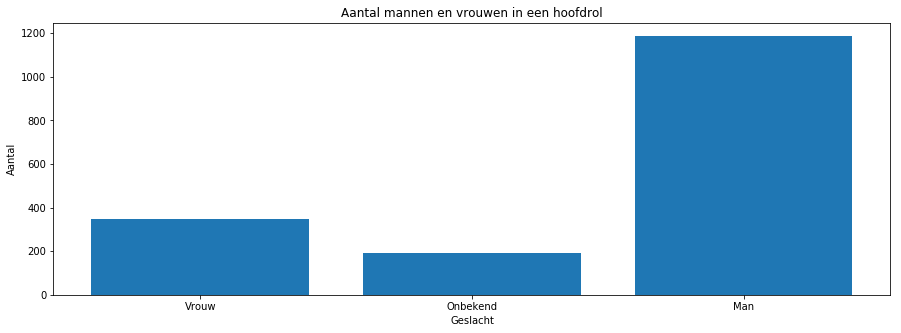

In [130]:
# Toon een barchart van de geslachten.
gender_name = ['Man', 'Vrouw', 'Onbekend']
genders = df_final['gender'].unique()
counter_per_gender = df_final['gender'].value_counts()

fig, aantal = plt.subplots(figsize=(15,5))
plt.xticks(genders, gender_name)
plt.xlabel('Geslacht')
plt.ylabel('Aantal')
plt.title('Aantal mannen en vrouwen in een hoofdrol')

plt.bar(genders, counter_per_gender)

plt.show()

TypeError: list indices must be integers or slices, not str